<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">TP : pertes de charge linéaire
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Notes de calcul
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt

# Mesures

In [2]:
# propriétés de l'eau utilisée
eta = 1.0e-3
rho = 1e3

In [3]:
## Données expérimentales étudiants
# Hauteur d'eau relévée
H = np.array([33, 31, 29, 27, 25, 23, 20, 15, 12, 5])/100
u_H = np.array(len(H)*[1])/100
# Instants de mesure
t=np.array([0, 5, 11, 16, 21, 27, 36, 52, 63, 103])
u_t=np.array(len(t)*[.5])

# Paramètre de la simulation MC
N=10000

# Listes de stockage
y_MC=[]
u_y_MC=[]

# Calcul des valeurs et des incertitude sur racine(H)
for j in range(len(H)):
    y_temp=[]
    for i in range(N):
        y_temp.append(np.sqrt(H[j] + u_H[j]*np.random.uniform(-1,1)))
    y_MC.append(np.mean(y_temp))
    u_y_MC.append(np.std(y_temp, ddof=1))

# Régression linéaire

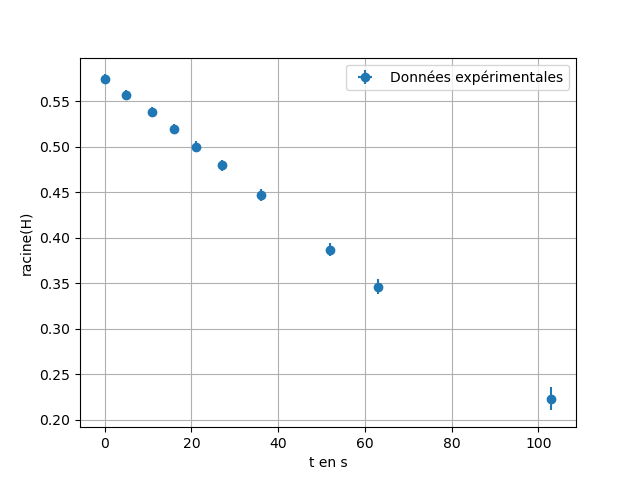

In [4]:
# Tracé des nuages de points et de leurs barres d'incertitude
plt.figure()
plt.errorbar(t, y_MC, xerr=u_t, yerr = u_y_MC, fmt='o',label="Données expérimentales")
plt.xlabel("t en s")
plt.ylabel("racine(H)")
plt.legend()
plt.grid(True)
plt.show()

L'aspect linéaire (affine en réalité) étant établi, on peut maintenant utiliser `numpy` pour proposer un régression linéaire associée à cette collection de points.<br/>

In [5]:
# Déclaration des tableaux de stockage
a_fit=[]
b_fit=[]

# Calcul des N pentes et ordonnées à l'orgine par la méthode polyfit de numpy
for i in range(N):
    z=np.polyfit(np.array(t+u_t*np.random.uniform(-1,1,len(t))), np.array(y_MC+u_y_MC*np.random.uniform(-1,1,len(y_MC))),1)
    a_fit.append(z[0])
    b_fit.append(z[1])

# Calcul de la moyenne et incertitude-type de la pente a et de l'ordonnée à l'origine b
a_fit_moy=np.mean(a_fit)
u_a_fit=np.std(a_fit,ddof=1)

b_fit_moy=np.mean(b_fit)
u_b_fit=np.std(b_fit, ddof=1)

On peut à nouveau tracer la courbe précédente en y rajoutant la droite obtenue par régression linéaire.

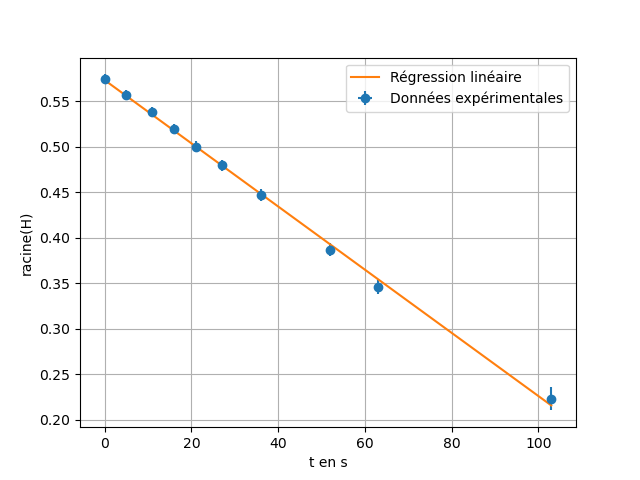

La valeur de la pente est de  -0.00347 +/- 0.000064 s^-1


In [6]:
# Calcul du nuage de points associé à la droite de régression calculée précédemment
x=np.linspace(0, np.max(t), 1000)
y=a_fit_moy*x + b_fit_moy

# Tracé du nuage de points associé aux valeurs possibles de mg et de l
plt.figure()
plt.errorbar(t, y_MC, xerr=u_t, yerr = u_y_MC, fmt='o' ,label="Données expérimentales")
plt.plot(x,y, label="Régression linéaire")
plt.xlabel("t en s")
plt.ylabel("racine(H)")
plt.legend()
plt.grid(True)
plt.show()

print("La valeur de la pente est de ",format(a_fit_moy,"#.5f"), "+/-",format(u_a_fit,"#.6f"),"s^-1")

In [7]:
# Données propres au tuyau et au récipient utilisés
D=74e-3 # diamètre du récipient en m
u_D = 0.1e-3
d=4.9e-3 # diamètre du tuyau de vidange en m
u_d = 0.1e-3
L=75e-2 # longueur du tuyau de vidange en m
u_L = 5e-3

# Simulation des valeurs possibles du coefficient alpha
alpha_MC=[]
for i in range(N):
    alpha_MC.append((d+u_d*np.random.uniform(-1,1))*(9.81*((d+u_d*np.random.uniform(-1,1))**4)/(2*(a_fit_moy**2)*((D+u_D*np.random.uniform(-1,1))**4))-1)/(L+u_L*np.random.uniform(-1,1)))

# Calcul de la valeur moyenne et de l'incertitude-type de alpha
alpha_moy=np.mean(alpha_MC)
u_alpha=np.std(alpha_MC, ddof=1)

print("La valeur du coefficient de perte de charge est ",format(alpha_moy,"#.4f"),"+/-",format(u_alpha,"#.4f") )

La valeur du coefficient de perte de charge est  0.0446 +/- 0.0025


In [8]:
Vmoy=-(H[4]-H[2])/(t[4]-t[2])
Reynolds_e = rho*Vmoy*D/eta
Reynolds_s = rho*(Vmoy*D**2/d**2)*d/eta

print("La valeur du nombre de Reynolds du récipient à vidanger est ",format(Reynolds_e,"#.0f"),"")
print("La valeur du nombre de Reynolds tuyau de vidange est ",format(Reynolds_s,"#.0f"),"")

La valeur du nombre de Reynolds du récipient à vidanger est  296. 
La valeur du nombre de Reynolds tuyau de vidange est  4470. 


<img src="Moody_diagram.png" style="length:100%">